In [1]:
!nvidia-smi

Thu Mar 14 18:36:27 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 410.79       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  TITAN Xp            Off  | 00000000:01:00.0 Off |                  N/A |
| 39%   60C    P0    76W / 250W |      0MiB / 12195MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import os

In [3]:
from keras.layers import Input
from keras.layers.core import Dense, Dropout
from keras.models import Model
from keras.losses import categorical_crossentropy, mse
from keras.optimizers import Adadelta, Adam, SGD

Using TensorFlow backend.


In [4]:
def plot_history(history, ymin_loss=None, ymax_loss=None, ymin_acc=None, ymax_acc=None):
    ymin_loss=np.min(history.history['loss'])
    ymax_loss=np.max(history.history['loss'])
    f1 = plt.figure()
    plt.plot(history.history['loss'],label='training')
    plt.plot(history.history['val_loss'],label='validation')
    plt.ylim(ymin_loss,ymax_loss)
    plt.legend(loc='upper right')
    plt.show()
    if 'acc' in history.history:
        ymin_acc=np.min(history.history['acc'])
        ymax_acc=np.max(history.history['acc'])
        f2 = plt.figure()
        plt.plot(history.history['acc'],label='training')
        plt.plot(history.history['val_acc'],label='validation')
        plt.ylim(ymin_acc,ymax_acc)
        plt.legend(loc='upper right')
        plt.show()
    return

In [5]:
data_dir = '/storage/yw18581/data/'
data_folder = os.path.join(data_dir, 'train_validation_test')

In [6]:
X_train = np.load(os.path.join(data_folder, 'Xy_train_dist.npz'))["y"]
y_train = np.load(os.path.join(data_folder, 'Xy_train_dist.npz'))["dist"]

In [7]:
X_val = np.load(os.path.join(data_folder,'Xy_val_dist.npz'))["y"]
y_val = np.load(os.path.join(data_folder, 'Xy_val_dist.npz'))["dist"]

In [8]:
X_test = np.load(os.path.join(data_folder, 'Xy_test_dist.npz'))["y"]
y_test = np.load(os.path.join(data_folder, 'Xy_test_dist.npz'))["dist"]

In [9]:
X_pred = np.load(os.path.join(data_dir, 'trained_models/UNet_training_generator_1500epochs/Xy_test_predicted_UNet.npz'))['y']
y_pred = np.load(os.path.join(data_dir, 'trained_models/UNet_training_generator_1500epochs/Xy_test_predicted_UNet.npz'))['dist']

In [10]:
def cut_X(arr):
    x_cut = arr[:,960:1300,600:]
    if len(x_cut.shape)>3:
        x_cut = x_cut[...,0]
    x_cut_out = x_cut.reshape(x_cut.shape[0],x_cut.shape[1]*x_cut.shape[2])
    return x_cut_out

In [11]:
X_train_cut = cut_X(X_train)

In [12]:
X_val_cut = cut_X(X_val)

In [13]:
X_test_cut = cut_X(X_test)

In [14]:
X_pred_cut = cut_X(X_pred)

In [15]:
def create_model(input_shape):
    input_layer = Input(shape=input_shape,name='input')
    x = Dense(256, activation='sigmoid')(input_layer)
    x = Dropout(0.3)(x)
    x = Dense(128, activation ='sigmoid')(x)
    x = Dropout(0.3)(x)
    x = Dense(64, activation ='sigmoid')(x)
    x = Dropout(0.3)(x)
    x = Dense(32, activation ='sigmoid')(x)
    x = Dropout(0.3)(x)
    x = Dense(16, activation ='sigmoid')(x)
    x = Dropout(0.3)(x)
    x = Dense(8, activation ='sigmoid')(x)
    prediction = Dense(1, activation='linear')(x)
    model = Model(inputs = input_layer, outputs = prediction)
    return model

model = create_model(input_shape=(X_train_cut.shape[1],))
model.compile(loss='mse',
              optimizer=Adadelta())
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 272000)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               69632256  
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
__________

In [16]:
history = model.fit(X_train_cut, y_train, validation_data=(X_val_cut, y_val),
                    epochs=100, verbose=True, batch_size=8, shuffle=True)

Train on 768 samples, validate on 192 samples
Epoch 1/100
768/768 [==============================] - 10s 13ms/step - loss: 151.3826 - val_loss: 137.9329
Epoch 2/100
768/768 [==============================] - 5s 6ms/step - loss: 123.2935 - val_loss: 119.6120
Epoch 3/100
768/768 [==============================] - 5s 6ms/step - loss: 109.5196 - val_loss: 108.7214
Epoch 4/100
768/768 [==============================] - 5s 6ms/step - loss: 100.9989 - val_loss: 101.3399
Epoch 5/100
768/768 [==============================] - 5s 6ms/step - loss: 95.2931 - val_loss: 96.2151
Epoch 6/100
768/768 [==============================] - 5s 6ms/step - loss: 91.2147 - val_loss: 92.4647
Epoch 7/100
768/768 [==============================] - 5s 6ms/step - loss: 88.5018 - val_loss: 89.8993
Epoch 8/100
768/768 [==============================] - 5s 6ms/step - loss: 86.5577 - val_loss: 88.0056
Epoch 9/100
768/768 [==============================] - 5s 6ms/step - loss: 85.2090 - val_loss: 86.5042
Epoch 10/100
768/

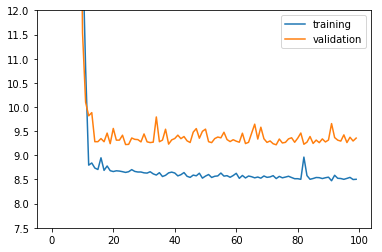

In [27]:
plot_history(history)

In [ ]:
preds = model.predict(X_test_cut)

In [ ]:
preds_classes = np.argmax(preds, axis=-1)

In [ ]:
preds_classes

In [ ]:
y_test

In [ ]:
def preds_to_classes(pred_array):
    pred_array[pred_array==2]=10
    pred_array[pred_array==0]=2
    pred_array[pred_array==1]=4
    pred_array[pred_array==3]=25
    return pred_array

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds_classes)

In [ ]:
preds_unet = model.predict(X_pred_cut)

In [ ]:
preds_classes_unet_masks = np.argmax(preds_unet, axis=-1)

In [ ]:
unet_classes_predicted = preds_to_classes(preds_classes_unet_masks)

In [ ]:
confusion_matrix(y_test, unet_classes_predicted)